In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%ls

drive/  sample_data/


In [ ]:
import io
import re
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import progressbar
import math

In [ ]:
# Read csv containing stocks and prices each day
path = "./drive/MyDrive/stock_prices.csv"
df_stock_prices = pd.read_csv(path)
df_stock_prices.columns= df_stock_prices.columns.str.lower()
df_stock_prices.rename(columns={'adj close': 'adj_close'}, inplace=True)
df_stock_prices['date'] = pd.to_datetime(df_stock_prices['date']).dt.date
df_stock_prices.head()

,unnamed: 0,ticker,date,high,low,open,close,volume,adj_close
0,0,A,2010-01-04,22.625179,22.267525,22.453505,22.389128,3815561,20.487324
1,1,A,2010-01-05,22.331903,22.002861,22.324751,22.145924,4186031,20.264782
2,2,A,2010-01-06,22.174536,22.002861,22.067240,22.067240,3243779,20.192783
3,3,A,2010-01-07,22.045780,21.816881,22.017166,22.038628,3095172,20.166595
4,4,A,2010-01-08,22.067240,21.745352,21.917025,22.031473,3733918,20.160051


In [ ]:
# Get all stock tickers
tickers = df_stock_prices['ticker'].unique()
tickers

array(['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN',
       'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL',
       'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE',
       'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET',
       'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE',
       'ATO', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AZO', 'BA',
       'BAC', 'BAX', 'BBY', 'BDX', 'BEN', 'BF-B', 'BIIB', 'BIO', 'BK',
       'BKNG', 'BKR', 'BLK', 'BLL', 'BMY', 'BR', 'BRK-B', 'BSX', 'BWA',
       'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE',
       'CCI', 'CCL', 'CDNS', 'CDW', 'CE', 'CERN', 'CF', 'CFG', 'CHD',
       'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME',
       'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COO', 'COP',
       'COST', 'CPB', 'CPRT', 'CRL', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTLT',
       'CTSH', 'CTVA', 'CTXS', 'CVS', 'CVX', 'CZR', 'D', 'DAL', 

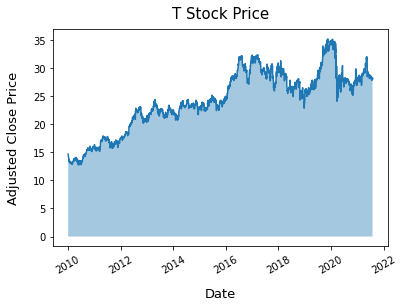

In [ ]:
# Plot average stock price over time for a specific stock
ticker = 'T'

price_ticker_mask = (df_stock_prices['ticker'] == ticker)
x = df_stock_prices.loc[price_ticker_mask, 'date']
y = df_stock_prices.loc[price_ticker_mask, 'adj_close']
plt.xticks(rotation = 30)
plt.plot(x, y)
plt.fill_between(x,y, alpha=0.4)
plt.xlabel("Date", labelpad=13, fontsize=13)
plt.ylabel("Adjusted Close Price", labelpad=13, fontsize=13)
plt.title(f"{ticker} Stock Price", y=1.02, fontsize=15);

plt.show()

In [ ]:
# Removes special characters and punctuation from tweet
# Code from https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [ ]:
# Read csv containaing stock tweets and sentiments
path = "./drive/MyDrive/stock_tweet_sentiments.csv"
df_tweet_sentiments = pd.read_csv(path)
df_tweet_sentiments.columns= df_tweet_sentiments.columns.str.lower()
df_tweet_sentiments['text'] = df_tweet_sentiments['text'].apply(clean_tweet)
df_tweet_sentiments

,text,sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user AAP MOVIE 55 return for the FEA GEED indi...,1
2,user I d be afraid to short AMZN they are look...,1
3,MNTA Over 12 00,1
4,OI Over 21 37,1
...,...,...
5786,Industry body CII said discoms are likely to s...,-1
5787,Gold prices slip below Rs 46 000 as investors ...,-1
5788,Workers at Bajaj Auto have agreed to a 10 wage...,1
5789,Sharemarket LIVE Sensex off day s high up 600 ...,1


In [ ]:
# Import nltk and metric libraries
import nltk
nltk.download('brown')
nltk.download('punkt')
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from sklearn.metrics import accuracy_score, classification_report

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Test Vader classifier
sid = SentimentIntensityAnalyzer()

# Calculate accuracy of Vader model from labelled tweets
y_pred = []
y_test = []
count = 0
for _, tweet in df_tweet_sentiments.iterrows():
  polarity_score = sid.polarity_scores(tweet.text)["compound"]
  sentiment_pred = 1 if polarity_score >= 0 else -1
  y_pred.append(sentiment_pred)
  y_test.append(tweet.sentiment)

accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f"Accuracy is {accuracy}%")
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy is 66.4%
Classification Report:

              precision    recall  f1-score   support

          -1       0.56      0.36      0.43      2106
           1       0.70      0.84      0.76      3685

    accuracy                           0.66      5791
   macro avg       0.63      0.60      0.60      5791
weighted avg       0.65      0.66      0.64      5791



In [ ]:
# Get tweets about top companies from 2015 to 2020
path = "./drive/MyDrive/stock_tweets.csv"
df_stock_tweets = pd.read_csv(path)

df_stock_tweets.drop(columns=['tweet_id', 'writer', 'comment_num', 'retweet_num', 'like_num'], inplace=True)
df_stock_tweets.rename(columns={'post_date': 'date', 'body': 'text'}, inplace=True)
df_stock_tweets['date'] = pd.to_datetime(df_stock_tweets['date'], unit='s').dt.date
df_stock_tweets['text'] = df_stock_tweets['text'].apply(clean_tweet)
df_stock_tweets.sort_values(by='date', inplace=True)
print(df_stock_tweets.shape[0])
df_stock_tweets

3717964


,date,text
0,2015-01-01,lx21 made 10 008 on AAPL Check it out Learn ho...
386,2015-01-01,Google Fiber s latest FCC filing is Comcast s ...
387,2015-01-01,Jeff Bezos lost 7 4 billion in Amazon s worst ...
388,2015-01-01,TSLA Weekly Updated via
389,2015-01-01,MSFT What Microsoft s fresh start browser stra...
...,...,...
3716509,2019-12-31,Stock Market Watchlist for 31 Dec 2019 SPY BA ...
3716508,2019-12-31,AMZN ZNGA Amazon Zynga Named Top Internet Sect...
3716507,2019-12-31,Trading Seasonality using Vertical Call Spread...
3716521,2019-12-31,Good morning folks last trading day of the dec...


In [ ]:
# Remove dates from stock price dataframe that aren't included in the stock tweets dataset, and only keep the 1 million most recent tweets
num_tweets = 2000000

df_stock_tweets = df_stock_tweets.tail(num_tweets) # Reduce dataset size, select starting from most recent tweets
df_stock_tweets.reset_index(drop=True, inplace=True)

start_date = df_stock_tweets.iloc[0]['date']
end_date = df_stock_tweets.iloc[-1]['date']

stock_price_mask = (df_stock_prices['date'] >= start_date) & (df_stock_prices['date'] <= end_date)
df_stock_prices = df_stock_prices.loc[stock_price_mask]

print(df_stock_prices.shape[0], df_stock_tweets.shape[0])
print(df_stock_prices)
print(df_stock_tweets)

350877 2000000
         unnamed: 0 ticker        date  ...       close   volume   adj_close
1812           1812      A  2017-03-16  ...   53.049999  2676900   51.091694
1813           1813      A  2017-03-17  ...   53.310001  1936900   51.342113
1814           1814      A  2017-03-20  ...   53.150002  1221400   51.188011
1815           1815      A  2017-03-21  ...   52.660000  1492700   50.716099
1816           1816      A  2017-03-22  ...   53.130001  1257100   51.168747
...             ...    ...         ...  ...         ...      ...         ...
1409312     1409312    ZTS  2019-12-24  ...  132.919998   442500  131.595566
1409313     1409313    ZTS  2019-12-26  ...  133.029999   929400  131.704453
1409314     1409314    ZTS  2019-12-27  ...  133.250000  1296100  131.922272
1409315     1409315    ZTS  2019-12-30  ...  132.210007   942000  130.892654
1409316     1409316    ZTS  2019-12-31  ...  132.350006  1128600  131.031250

[350877 rows x 9 columns]
               date               

In [ ]:
# Returns all stock mentioned in a tweet
def get_stocks_in_tweet(tweet):
  tweet = tweet.split()
  return [ticker for ticker in tickers if ticker in tweet]

In [ ]:
# Get average sentiment each day for all mentioned stocks
# stock_sentiment_dict = collections.defaultdict(list)
stock_sentiment_dict = dict()

start_time = datetime.now()

# Create progress bar
widgets = [
  ' [', progressbar.Timer(), '] ',
  progressbar.Bar(),
  ' (', progressbar.ETA(), ') '
]
bar = progressbar.ProgressBar(
    widgets=widgets, max_value=df_stock_tweets.shape[0]).start()

for index, tweet in df_stock_tweets.iterrows():
  # Update progress bar
  bar.update(index + 1)

  date = tweet['date']
  polarity_score = sid.polarity_scores(tweet['text'])['compound']
  mentioned_stocks = get_stocks_in_tweet(tweet['text'])
  for stock in mentioned_stocks:
    if (stock, date) in stock_sentiment_dict:
      sum_polarity_score, len_polarity_score = stock_sentiment_dict[(stock, date)]
      stock_sentiment_dict[(stock, date)] = (sum_polarity_score+polarity_score, len_polarity_score+1)
    else:
      stock_sentiment_dict[(stock, date)] = (polarity_score, 1)
    # stock_sentiment_dict[(stock, date)].append(polarity_score)
    
bar.finish()

stock_sentiments = list()
for (stock, date), (sum_polarity_score, len_polarity_score) in stock_sentiment_dict.items():
  # avg_polarity_score = sum(polarity_scores)/len(polarity_scores)
  stock_sentiments.append([stock, date, round(sum_polarity_score/len_polarity_score, 4)])

df_stock_sentiments = pd.DataFrame(stock_sentiments,columns=['ticker','date','avg_sentiment'])
df_stock_sentiments.sort_values(by=['ticker', 'date'], inplace=True)


end_time = datetime.now()
print(f"Runtime: {str(end_time - start_time)[:-3]}")
df_stock_sentiments.loc[df_stock_sentiments['ticker']=='TSLA']

 [Elapsed Time: 0:18:41] |##################################| (Time:  0:18:41) 


Runtime: 0:18:42.390


,ticker,date,avg_sentiment
1,TSLA,2017-03-16,0.0873
48,TSLA,2017-03-17,0.1076
211,TSLA,2017-03-18,0.1731
312,TSLA,2017-03-19,0.2035
395,TSLA,2017-03-20,0.1061
...,...,...,...
189628,TSLA,2019-12-27,0.1169
189860,TSLA,2019-12-28,0.1754
190000,TSLA,2019-12-29,0.1394
190161,TSLA,2019-12-30,0.1223


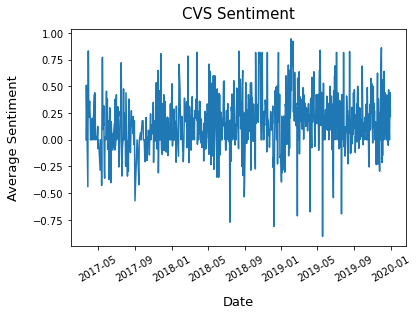

In [ ]:
# Plot average sentiment over time for a specific stock
ticker = 'CVS'

sentiment_date_mask = (df_stock_sentiments['date'] >= start_date) & (df_stock_sentiments['date'] <= end_date)
sentiment_ticker_mask = (df_stock_sentiments['ticker'] == ticker)
x = df_stock_sentiments.loc[sentiment_date_mask & sentiment_ticker_mask, 'date']
y = df_stock_sentiments.loc[sentiment_date_mask & sentiment_ticker_mask, 'avg_sentiment']
plt.xticks(rotation=30)
plt.plot(x, y)
plt.xlabel("Date", labelpad=13, fontsize=13)
plt.ylabel("Average Sentiment", labelpad=13, fontsize=13)
plt.title(f"{ticker} Sentiment", y=1.02, fontsize=15);

plt.show()

In [ ]:
# Merge stock prices and stock sentiments by date and ticker
df_merged = pd.merge(df_stock_prices[['ticker', 'date', 'adj_close']], df_stock_sentiments[['ticker', 'date', 'avg_sentiment']], how='inner')
df_merged = df_merged.loc[df_merged['ticker'] == ticker, ['date', 'adj_close', 'avg_sentiment']]
df_merged.set_index('date', inplace=True)
df_merged

,adj_close,avg_sentiment
date,,
2017-03-22,68.767570,0.0000
2017-03-23,68.627342,0.5106
2017-03-28,68.899040,-0.4404
2017-03-29,69.030502,0.8316
2017-03-30,69.109406,0.8316
...,...,...
2019-12-23,70.714760,-0.0427
2019-12-24,70.838348,-0.0516
2019-12-26,70.809837,0.1808


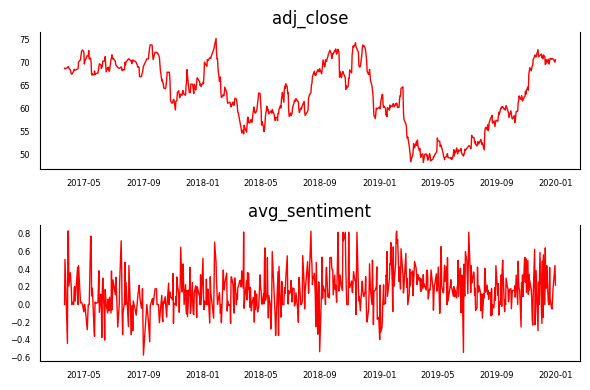

In [ ]:
# Plot adjacent closing price and average sentiment over time
# Code from https://towardsdatascience.com/granger-causality-and-vector-auto-regressive-model-for-time-series-forecasting-3226a64889a6
fig, axes = plt.subplots(nrows=2, ncols=1, dpi=100)
for i, ax in enumerate(axes.flatten()):
  data = df_merged[df_merged.columns[i]]
  ax.plot(data, color='red', linewidth=1)
  ax.set_title(df_merged.columns[i])
  ax.xaxis.set_ticks_position('none')
  ax.yaxis.set_ticks_position('none')
  ax.spines['top'].set_alpha(0)
  ax.tick_params(labelsize=6)
plt.tight_layout();

In [ ]:
# Test adjusted closing prices and average sentiment for normality and skew
from scipy import stats
stat_price, p_price = stats.normaltest(df_merged['adj_close'])
stat_sentiment, p_sentiment = stats.normaltest(df_merged['avg_sentiment'])
alpha = 0.05
print("Stock normality statistic=%.3f, p=%.3f" % (stat_price, p_price))
print("Sentiment normality statistic=%.3f, p=%.3f" % (stat_sentiment, p_sentiment))
print()

print("Stock price data looks Gaussian" if p_price > alpha else "Stock price data looks non-Gaussian")
print("Stock sentiment data looks Gaussian" if p_sentiment > alpha else "Stock sentiment data looks non-Gaussian")
print()

print(f"Stock price data skewness: {stats.skew(df_merged['adj_close'])}")
print(f"Stock sentiment data skewness: {stats.skew(df_merged['avg_sentiment'])}")

Stock normality statistic=121.918, p=0.000
Sentiment normality statistic=19.070, p=0.000

Stock price data looks non-Gaussian
Stock sentiment data looks non-Gaussian

Stock price data skewness: -0.33355357511892075
Stock sentiment data skewness: 0.3159856974541475


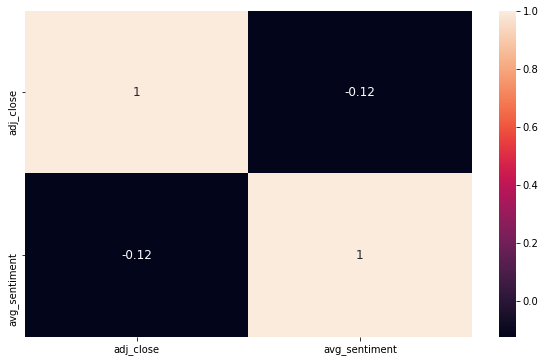

In [ ]:
# Plot correlation between adjusted close price and average sentiment
corr = df_merged.corr(method='pearson')
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, annot_kws={'size': 12})
heat_map = plt.gcf()
heat_map.set_size_inches(10,6)
plt.show()

In [ ]:
# Split merged dataset into train and test data
n_obs=15
X_train, X_test = df_merged[0:-n_obs], df_merged[-n_obs:]
print(X_train.shape, X_test.shape)

(629, 2) (15, 2)


In [ ]:
# Apply first differencing
X_train_transformed = X_train.diff().dropna()
print(X_train_transformed)
X_train_transformed.describe()

            adj_close  avg_sentiment
date                                
2017-03-23  -0.140228         0.5106
2017-03-28   0.271698        -0.9510
2017-03-29   0.131462         1.2720
2017-03-30   0.078903         0.0000
2017-03-31  -0.306778        -0.6209
...               ...            ...
2019-12-02   0.266205        -0.5894
2019-12-03  -0.798599        -0.2139
2019-12-04   0.275696         0.7045
2019-12-05  -0.494362        -0.6386
2019-12-06   0.836632         0.7104

[628 rows x 2 columns]


,adj_close,avg_sentiment
count,628.000000,628.000000
mean,0.004584,0.000896
std,1.079783,0.295013
min,-5.242920,-0.951000
25%,-0.539167,-0.170050
50%,0.054392,0.000000
75%,0.604785,0.154975
max,3.870285,1.272000


In [ ]:
# Check for stationarity (low p-value suggests no unit root -> stationary time series)
# Code from https://towardsdatascience.com/granger-causality-and-vector-auto-regressive-model-for-time-series-forecasting-3226a64889a6
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_statistics(time_series, name):
  result = adfuller(time_series.values)
  print(f"Augmented Dickey-Fuller Test: {name} Time Series")
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
  
augmented_dickey_fuller_statistics(X_train_transformed['adj_close'], 'Adjusted Close')
augmented_dickey_fuller_statistics(X_train_transformed['avg_sentiment'], 'Average Sentiment')

Augmented Dickey-Fuller Test: Adjusted Close Time Series
ADF Statistic: -22.435993
p-value: 0.000000
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569
Augmented Dickey-Fuller Test: Average Sentiment Time Series
ADF Statistic: -10.556430
p-value: 0.000000
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569


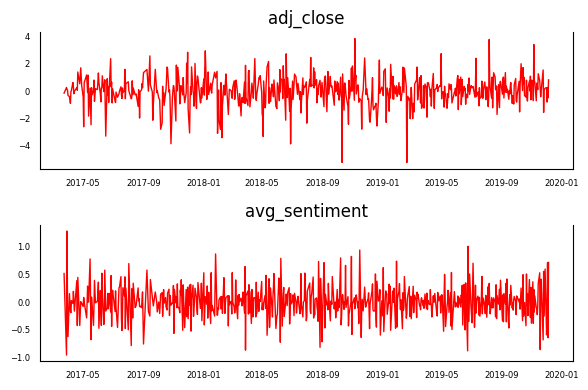

In [ ]:
# Plot variation over time to check for stationarity
# Code from https://towardsdatascience.com/granger-causality-and-vector-auto-regressive-model-for-time-series-forecasting-3226a64889a6
fig, axes = plt.subplots(nrows=2, ncols=1, dpi=100)
for i, ax in enumerate(axes.flatten()):
  d = X_train_transformed[X_train_transformed.columns[i]]
  ax.plot(d, color='red', linewidth=1)

  # Decorations
  ax.set_title(X_train_transformed.columns[i])
  ax.xaxis.set_ticks_position('none')
  ax.yaxis.set_ticks_position('none')
  ax.spines['top'].set_alpha(0)
  ax.tick_params(labelsize=6)
plt.tight_layout();

In [ ]:
# Perform Granger causality test (p-value < 0.05 suggests x Granger causes y)
# Code from https://stackoverflow.com/questions/58005681/is-it-possible-to-run-a-vector-autoregression-analysis-on-a-large-gdp-data-with
from statsmodels.tsa.stattools import grangercausalitytests

maxlag=12
test = 'ssr-chi2test'

def grangers_causality_matrix(data, variables, test = 'ssr_chi2test', verbose=False):

    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in dataset.columns:
        for r in dataset.index:
            test_result = grangercausalitytests(data[[r,c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')

            min_p_value = np.min(p_values)
            dataset.loc[r,c] = min_p_value

    dataset.columns = [var+'_x' for var in variables]
    dataset.index = [var+'_y' for var in variables]
    return dataset

print(X_train_transformed.columns)
grangers_causality_matrix(X_train, variables = X_train.columns) 

Index(['adj_close', 'avg_sentiment'], dtype='object')


,adj_close_x,avg_sentiment_x
adj_close_y,1.0000,0.0313
avg_sentiment_y,0.0047,1.0000


In [ ]:
# Fit VAR model on train dataset
# Code from https://towardsdatascience.com/granger-causality-and-vector-auto-regressive-model-for-time-series-forecasting-3226a64889a6
from statsmodels.tsa.api import VAR

mod = VAR(X_train_transformed)
res = mod.fit(maxlags=15, ic='aic')
print(res.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 06, Aug, 2021
Time:                     21:54:25
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -2.44220
Nobs:                     617.000    HQIC:                  -2.64383
Log likelihood:          -849.779    FPE:                  0.0625352
AIC:                     -2.77209    Det(Omega_mle):       0.0581213
--------------------------------------------------------------------
Results for equation adj_close
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                     0.004357         0.043126            0.101           0.920
L1.adj_close              0.115722         0.041042            2.820           0.005
L1.avg_sentiment         -0.108192      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
# Calculate Durbin-Watson Statistic (range of 0 to 4, 1.5 to 2.5 suggests minimal auto-correlation)
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(res.resid)

for col, val in zip(X_train_transformed.columns, out):
  print((col), ':', round(val, 2))

adj_close : 2.0
avg_sentiment : 2.0


In [ ]:
# Forecast future values using past lags
lag_order = res.k_ar
print(lag_order)

# Input data for forecasting
input_data = X_train_transformed.values[-lag_order:]
print(input_data)

# forecasting
pred = res.forecast(y=input_data, steps=n_obs)
pred = pd.DataFrame(pred, index=X_test.index, columns=X_test.columns + '_pred')
pred

11
[[-0.40881348  0.2028    ]
 [ 0.01903534  0.4092    ]
 [ 1.55918121 -0.6782    ]
 [-1.55918121  0.5478    ]
 [ 0.09506226 -0.2532    ]
 [ 0.21865845  0.5894    ]
 [ 0.26620483 -0.5894    ]
 [-0.79859924 -0.2139    ]
 [ 0.2756958   0.7045    ]
 [-0.49436188 -0.6386    ]
 [ 0.83663177  0.7104    ]]


,adj_close_pred,avg_sentiment_pred
date,,
2019-12-09,-0.553503,-0.414223
2019-12-10,0.542553,-0.037020
2019-12-11,-0.410116,0.083884
2019-12-12,0.382869,-0.064605
2019-12-13,-0.215524,0.089345
2019-12-16,0.015724,-0.086389
2019-12-17,0.367148,0.061229
2019-12-18,-0.511458,-0.046869
2019-12-19,0.512030,-0.018814


In [ ]:
# De-difference forecasts from the training data scale
def invert_transformation(X_train, pred):
  forecast = pred.copy()
  columns = X_train.columns
  for col in columns:
    forecast[str(col)+'_pred'] = X_train[col].iloc[-1] + forecast[str(col)+'_pred'].cumsum()
  return forecast
  
output = invert_transformation(X_train, pred)

In [ ]:
# Merge predicted and true data set
merged_forecasts = pd.concat([output['adj_close_pred'], X_test['adj_close']], axis=1)
merged_forecasts['accuracy'] = round(merged_forecasts.apply(lambda row: row['adj_close_pred'] / row['adj_close'] * 100, axis = 1),2)
merged_forecasts['accuracy'] = pd.Series(["{0:.2f}%".format(val) for val in merged_forecasts['accuracy']], index = merged_forecasts.index)
merged_forecasts = merged_forecasts.round(decimals=2)
merged_forecasts = merged_forecasts.reset_index()
merged_forecasts = merged_forecasts.sort_values(by='date', ascending=False)
merged_forecasts

,date,adj_close_pred,adj_close,accuracy
14,2019-12-31,42.42,43.40,97.74%
13,2019-12-30,42.45,43.60,97.36%
12,2019-12-27,42.41,43.52,97.44%
11,2019-12-26,42.41,43.40,97.73%
10,2019-12-24,42.45,42.97,98.77%
9,2019-12-23,42.37,42.56,99.55%
8,2019-12-20,42.30,42.55,99.43%
7,2019-12-19,42.33,42.11,100.51%
6,2019-12-18,42.24,41.68,101.35%
5,2019-12-17,42.31,41.87,101.04%


In [ ]:
# Compute bias and errors
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

forecast_errors = [merged_forecasts['adj_close'][i]- merged_forecasts['adj_close_pred'][i] for i in range(len(merged_forecasts['adj_close']))]
bias = sum(forecast_errors) * 1.0/len(merged_forecasts['adj_close'])

print('Bias: %f' % bias)
print('Mean absolute error:', mae(merged_forecasts['adj_close'].values, merged_forecasts['adj_close_pred'].values))
print('Mean squared error:', mse(merged_forecasts['adj_close'].values, merged_forecasts['adj_close_pred'].values))
print('Root mean squared error:', math.sqrt(mse(merged_forecasts['adj_close'].values, merged_forecasts['adj_close_pred'].values)))
# Good predictions at num_tweets=1000000: T (MAE=0.301), CMCSA (MAE=0.67), CVS (MAE=0.901)
# Good predictions at num_tweets=2000000: EBAY (MAE=0.775), CVS (MAE=0.703)

Bias: -0.010667
Mean absolute error: 0.7026666666666667
Mean squared error: 0.7095999999999995
Root mean squared error: 0.8423775875461071
